# Multi-Class Prediction of Obesity Risk

## Table of Contents

1. [Introduction](#Intro)
1. [Import Libraries](#Lib)
1. [Load Data](#Load)
1. [EDA - Univariate](#Uni)
    1. [Categorical Variables](#cat)
    1. [Numerical Variables](#num)
    1. [Target Variable](#target)
1. [EDA - Multivariate](#multi)
    1. [Numerical vs Numerical](#numvnum)
    1. [Numerical vs Target](#numvtar)
    1. [Categorical vs Target](@catvtar)
1. [Feature Engineering](#FE)
1. [Model Building](#model)
    1. [Baseline Model](#baseline)
    1. [Hyperparameter Tuning](#tuning)
1. [Submission](#submit)

<a id='Intro'></a>

### Introduction

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)
variables obtained :
Gender, Age, Height and Weight.

NObesity values are:

•Underweight Less than 18.5
•Normal 18.5 to 24.9
•Overweight 25.0 to 29.9
•Obesity I 30.0 to 34.9
•Obesity II 35.0 to 39.9
•Obesity III Higher than 40

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format.

<a id='Lib'></a>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split,StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams.update({'font.family':'Constantia', 'font.serif':['Constantia']})
plt.rcParams.update({'pdf.fonttype': 'truetype', 'font.size': 18})

<a id='Load'></a>

### Load the Data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
original = pd.read_csv('data/ObesityDataSet.csv')

train.drop('id',axis=1,inplace=True)

In [3]:
train = pd.concat([train,original]).drop_duplicates()

In [4]:
train.shape, test.shape

((22845, 17), (13840, 17))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22845 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22845 non-null  object 
 1   Age                             22845 non-null  float64
 2   Height                          22845 non-null  float64
 3   Weight                          22845 non-null  float64
 4   family_history_with_overweight  22845 non-null  object 
 5   FAVC                            22845 non-null  object 
 6   FCVC                            22845 non-null  float64
 7   NCP                             22845 non-null  float64
 8   CAEC                            22845 non-null  object 
 9   SMOKE                           22845 non-null  object 
 10  CH2O                            22845 non-null  float64
 11  SCC                             22845 non-null  object 
 12  FAF                             2

In [6]:
categorical = [var for var in train.columns if train[var].dtype == 'object' and var !='NObeyesdad']
numerical = [var for var in train.columns if train[var].dtype != 'object' and var !='NObeyesdad']
target = 'NObeyesdad'

print(f'There are {len(categorical)} categorical variables')
print(categorical)
print('\n')
print(f'There are {len(numerical)} numerical variables')
print(numerical)

There are 8 categorical variables
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


There are 8 numerical variables
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


<a id='Uni'></a>

### EDA - Univariate Analysis

<a id='cat'></a>

#### Categorical variables

Female    0.50151
Male      0.49849
Name: Gender, dtype: float64


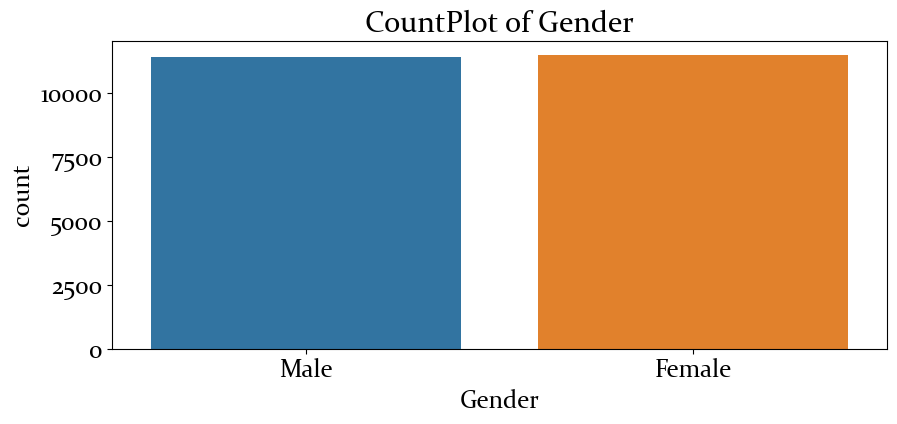



yes    0.820136
no     0.179864
Name: family_history_with_overweight, dtype: float64


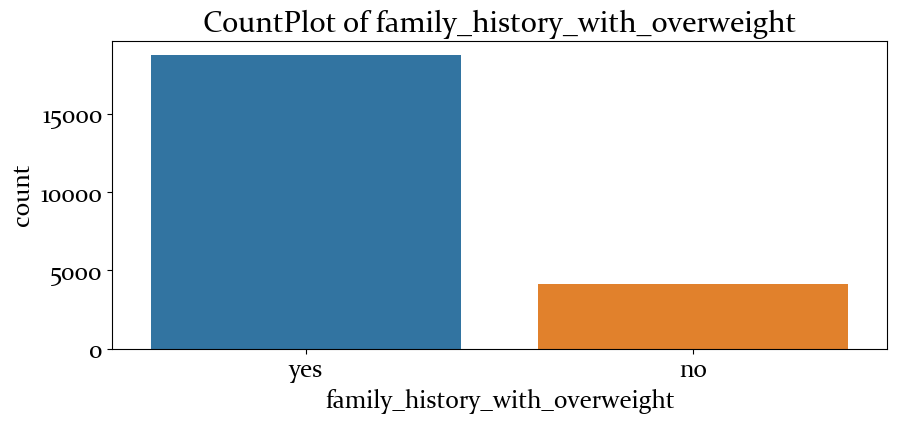



yes    0.911622
no     0.088378
Name: FAVC, dtype: float64


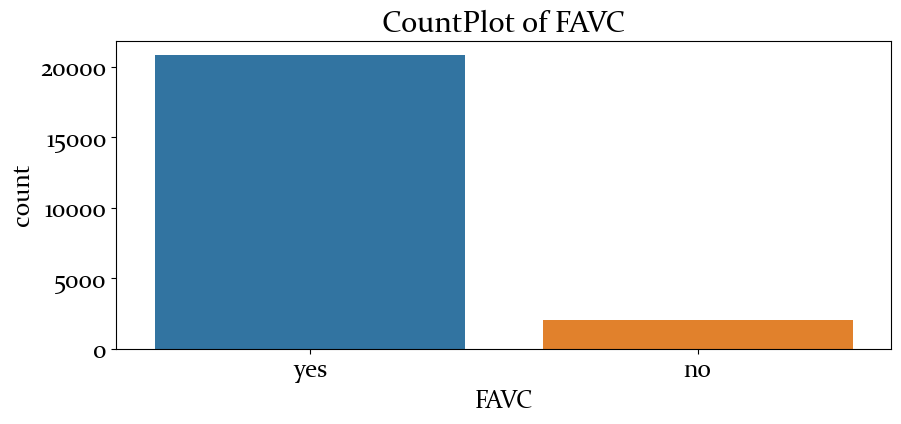



Sometimes     0.844386
Frequently    0.118538
Always        0.023244
no            0.013832
Name: CAEC, dtype: float64


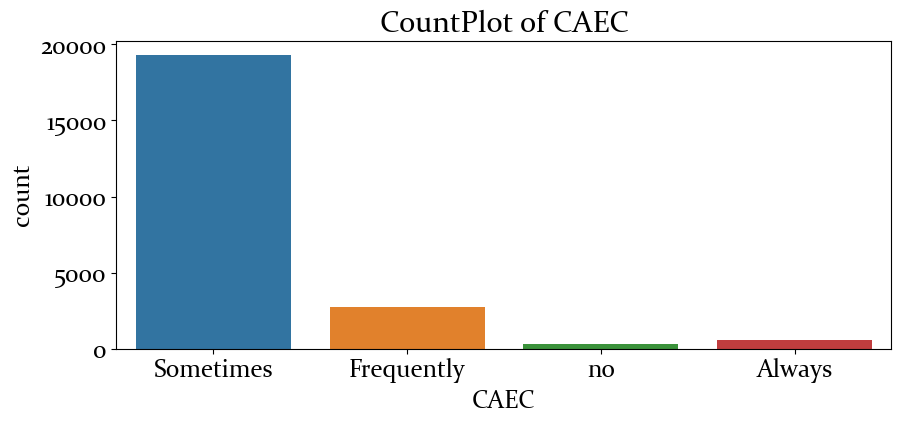



no     0.98735
yes    0.01265
Name: SMOKE, dtype: float64


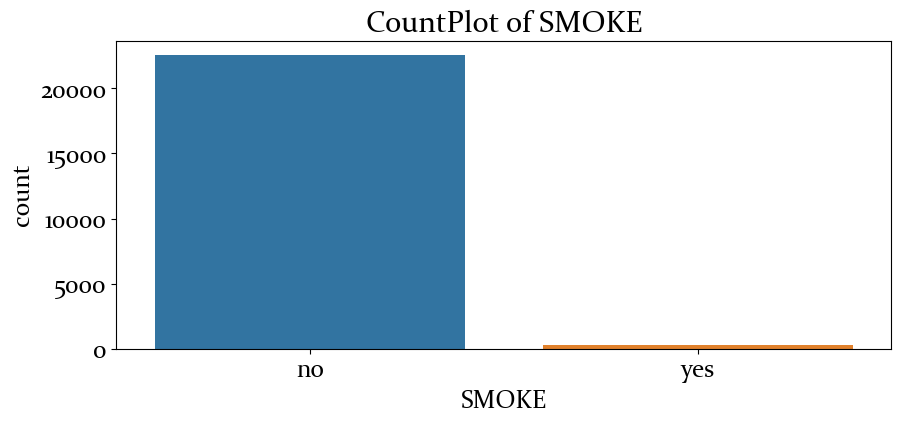



no     0.965726
yes    0.034274
Name: SCC, dtype: float64


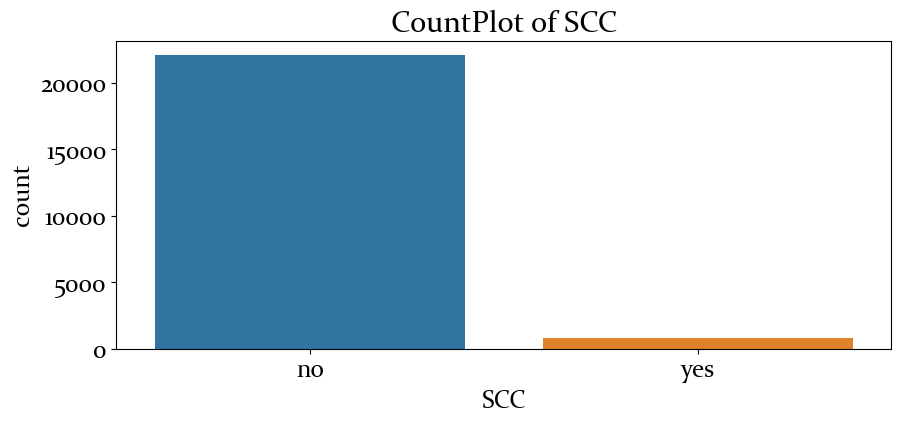



Sometimes     0.719895
no            0.253841
Frequently    0.026220
Always        0.000044
Name: CALC, dtype: float64


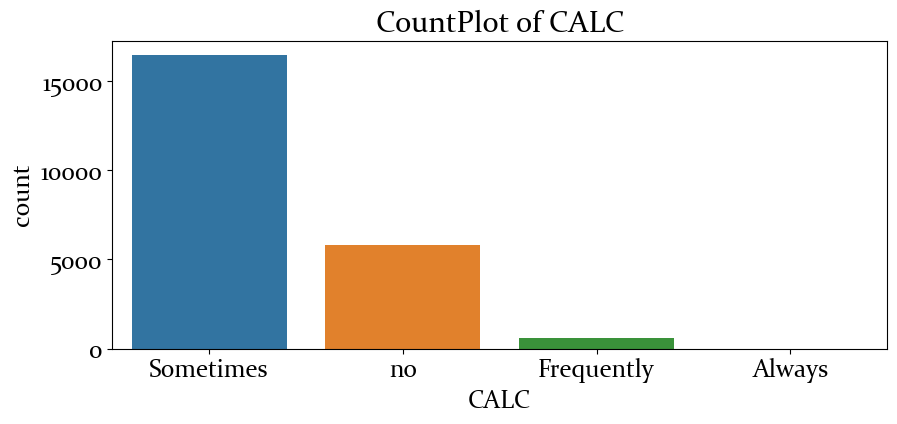



Public_Transportation    0.798643
Automobile               0.174655
Walking                  0.022850
Motorbike                0.002145
Bike                     0.001707
Name: MTRANS, dtype: float64


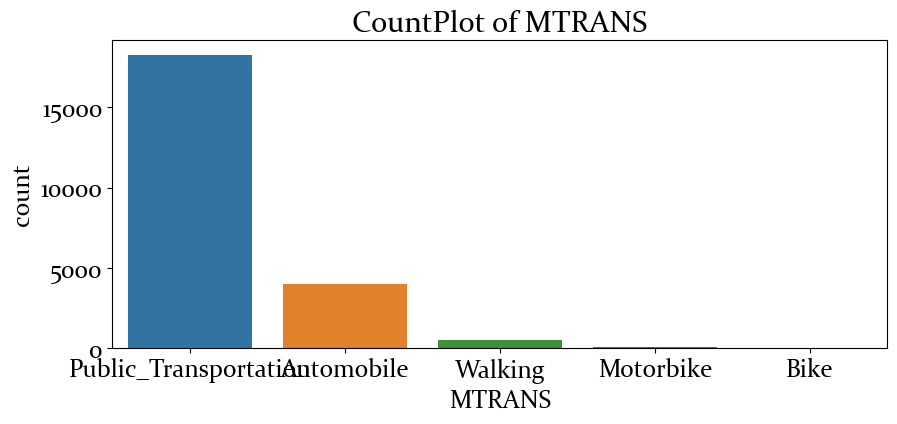

In [7]:
for var in categorical:
    plt.figure(figsize=(10,4))
    print(train[var].value_counts(normalize=True))
    fig = sns.countplot(data=train,x=var)
    fig.set_title(f'CountPlot of {var}')
    plt.show()
    print('\n')
    

#### Important Observations on Univariate Analysis of Categorical Variables

> Except for the gender variable, other categorical varibales are unevenly distributed.

> Gender - There are equal class disctributions of Male and Female in the dataset. It seems to say that both the genders are equally affected by Obesity.

> family_history_with_overweight - The 'yes' category highly overweighs the 'no' category. There can be a clear conclusion made that family history with Obesity can affect and can have a significant impact.

> Frequent consumption of high caloric food (FAVC) - The 'yes' category highly overweighs the 'no' category. There shouldn't be any surprise that the high calorific intake can lead to obesity.

> Consumption of food between meals (CAEC) - Sometimes category has the highest occurence followed by Frequent. There cannot be any clear decision that can be established by this plot.

> Consumption of alcohol (CALC) - 72% of the people consume alcohol and only 2% consume on a frequent basis.

> Calories consumption monitoring (SCC) - 96% of the people dont monitor or count their calories consumption. 

> Transportation used (MTRANS) - 80% of the people use public transport, since this is more of a economic and a personal preference, more analysis needed to conclude.

>SMOKE - 98% of the persons in the dataset dont smoke. It can be said that Smoke may not affect obesity.

<a id='num'></a>

#### Numerical variables

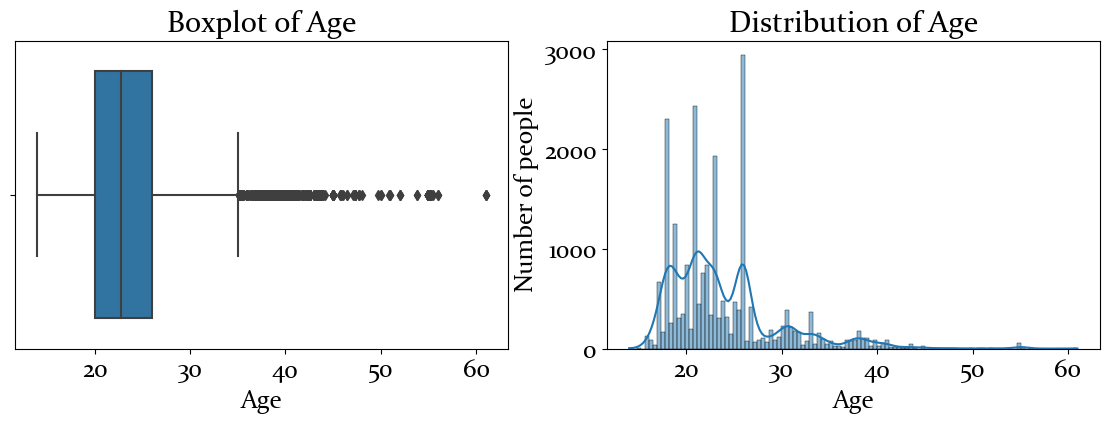

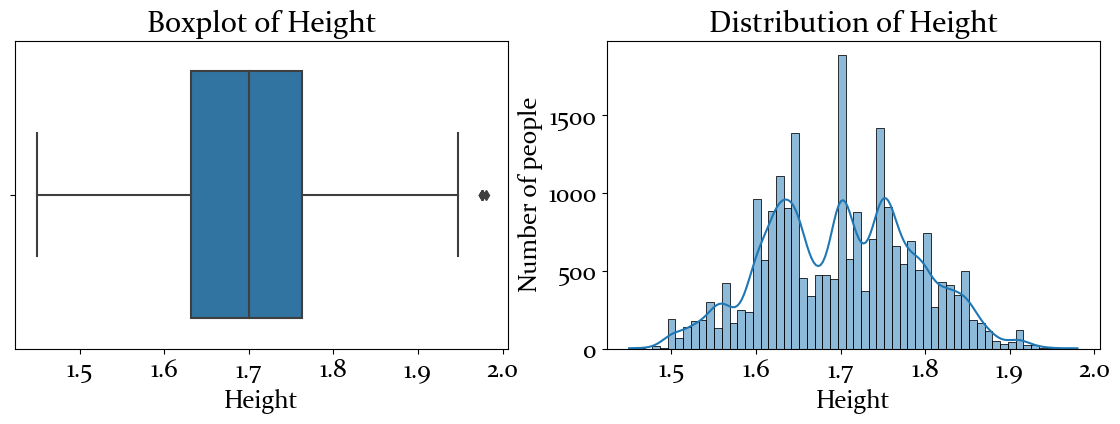

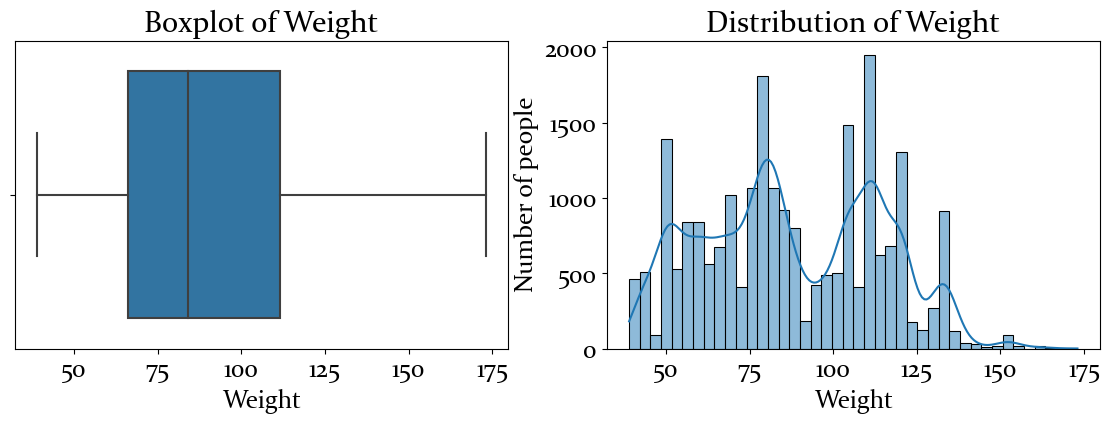

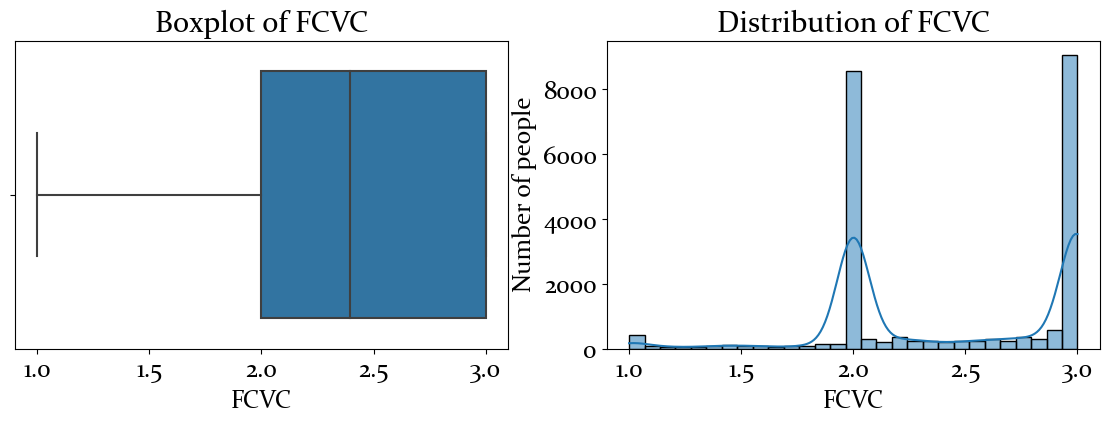

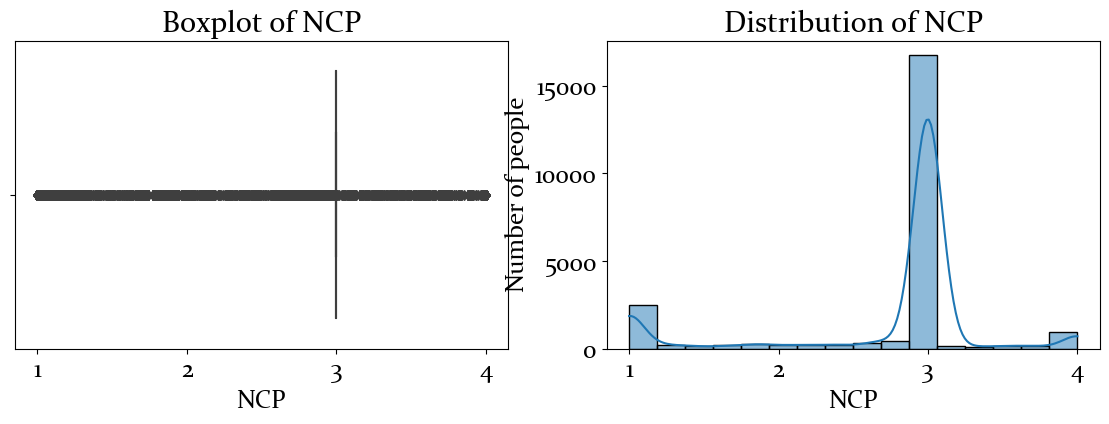

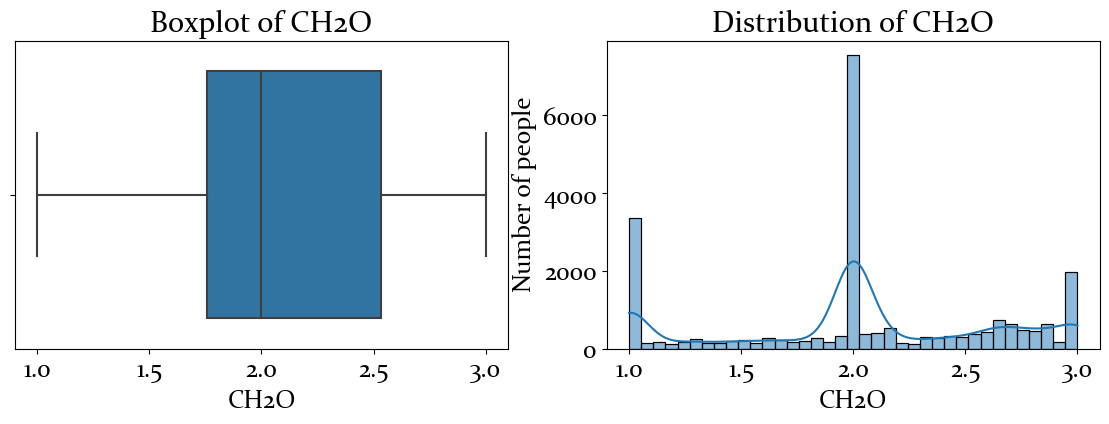

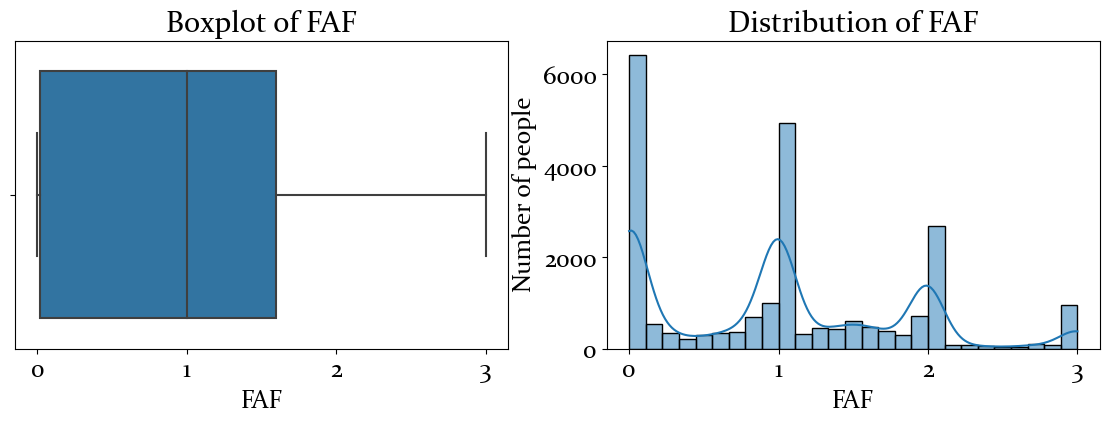

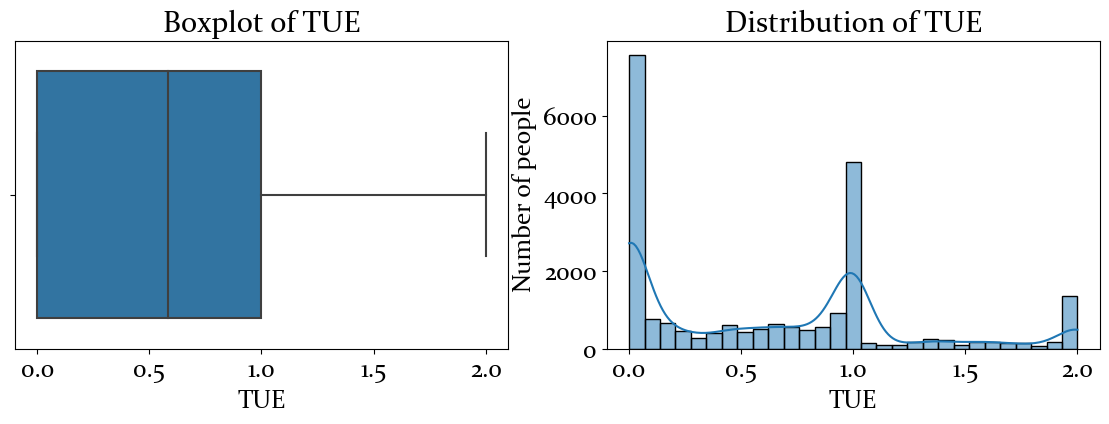

In [8]:
for var in numerical:
    plt.figure(figsize=(14,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(data=train,x = var)
    fig.set_title(f'Boxplot of {var}')
    
    plt.subplot(1, 2, 2)
    fig = sns.histplot(data=train,x = var,kde=True)
    fig.set_ylabel('Number of people')
    fig.set_xlabel(var)
    fig.set_title(f'Distribution of {var}')

    plt.show()

#### Important Observations on Univariate Analysis of Numerical Variables

> Age column has around half of the data in the range of 20-30 with lots of outliers at the right end.
the distribution is highly skewed towards the right.

> Height and Weight are  somewhat(not entirely) normally distributed with very few outliers. Weight new features like obses and not obese.

> NCP - Number of main meals - Majority of the people have 3 main meals with few people having either 1 or 4.

> Consumption of water daily (CH20) - WHO recommends around 3 litres consumption and here in the data we
have most of the people consumption around 2-2.5 litres.

> Physical activity frequency (FAF) - Most people do little to no excercise as per the distribution on the boxplot.

> Time using technology devices (TUE) - Most people spend little to no time as per the distribution on the boxplot. 


<a id='target'></a>

#### Target variable

Obesity_Type_III       0.191289
Obesity_Type_II        0.155176
Normal_Weight          0.147253
Obesity_Type_I         0.142745
Overweight_Level_II    0.123090
Insufficient_Weight    0.122127
Overweight_Level_I     0.118319
Name: NObeyesdad, dtype: float64


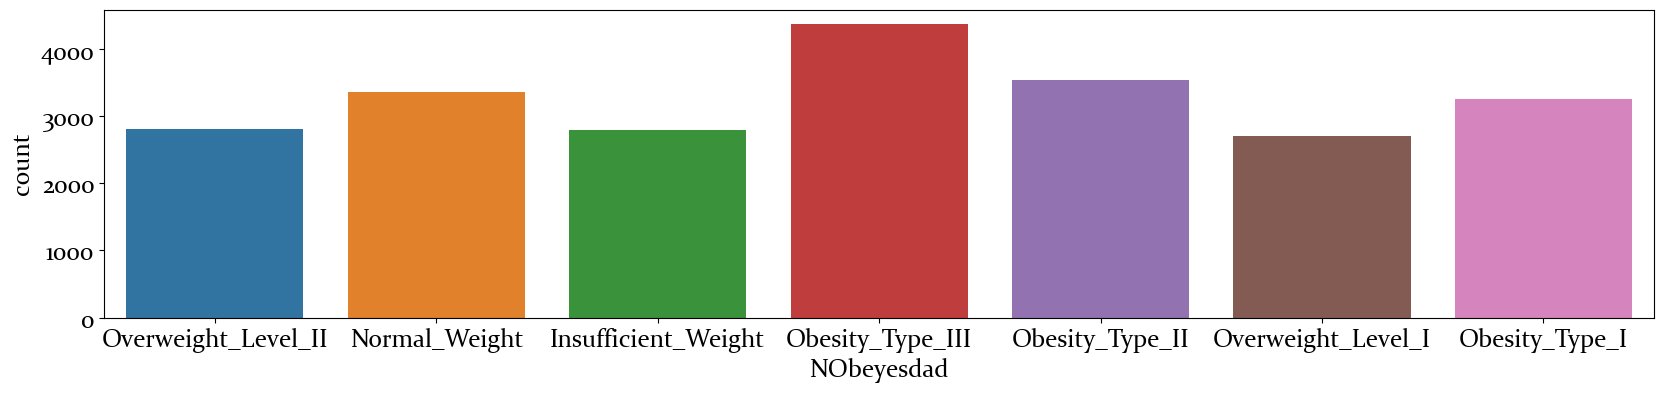

In [9]:
plt.figure(figsize=(20,4))
print(train[target].value_counts(normalize=True))
sns.countplot(data=train,x=target)
plt.show()

Target classes are almost equally distributed with Obesity_type_III as the most frequent class

<a id='multi'></a>

### Multivariate Analysis

<a id='numvnum'></a>
#### Numerical vs Numerical

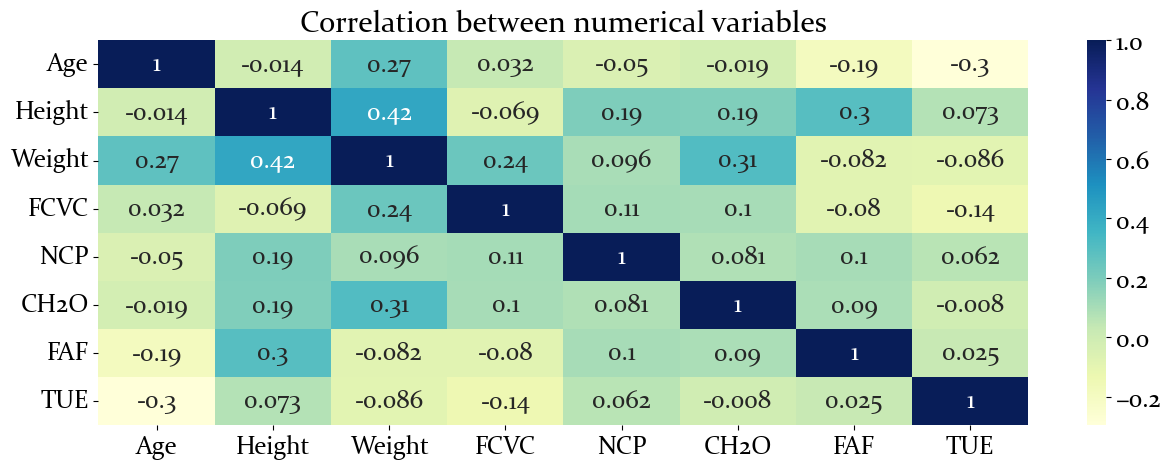

In [10]:
plt.figure(figsize=(15,5))
fig = sns.heatmap(train[numerical].corr(), cmap="YlGnBu", annot=True)
fig.set_title("Correlation between numerical variables")
plt.show()

No clear correlation between any of the numerical variables

<a id='numvtar'></a>

#### Numerical vs Target

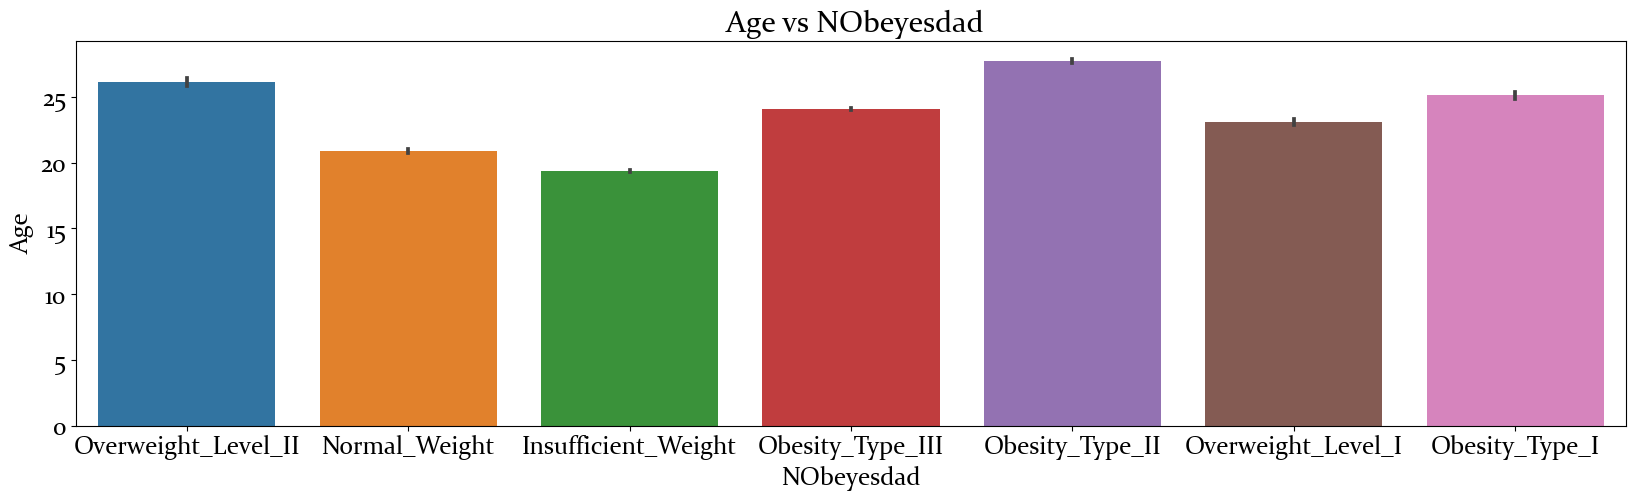

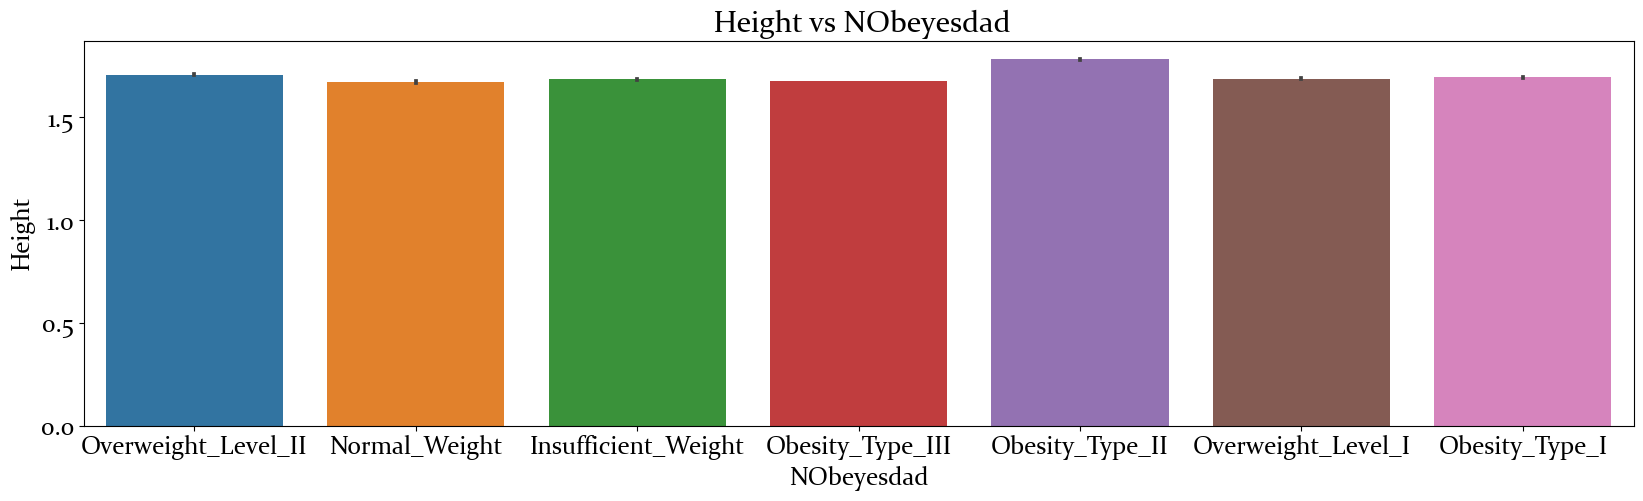

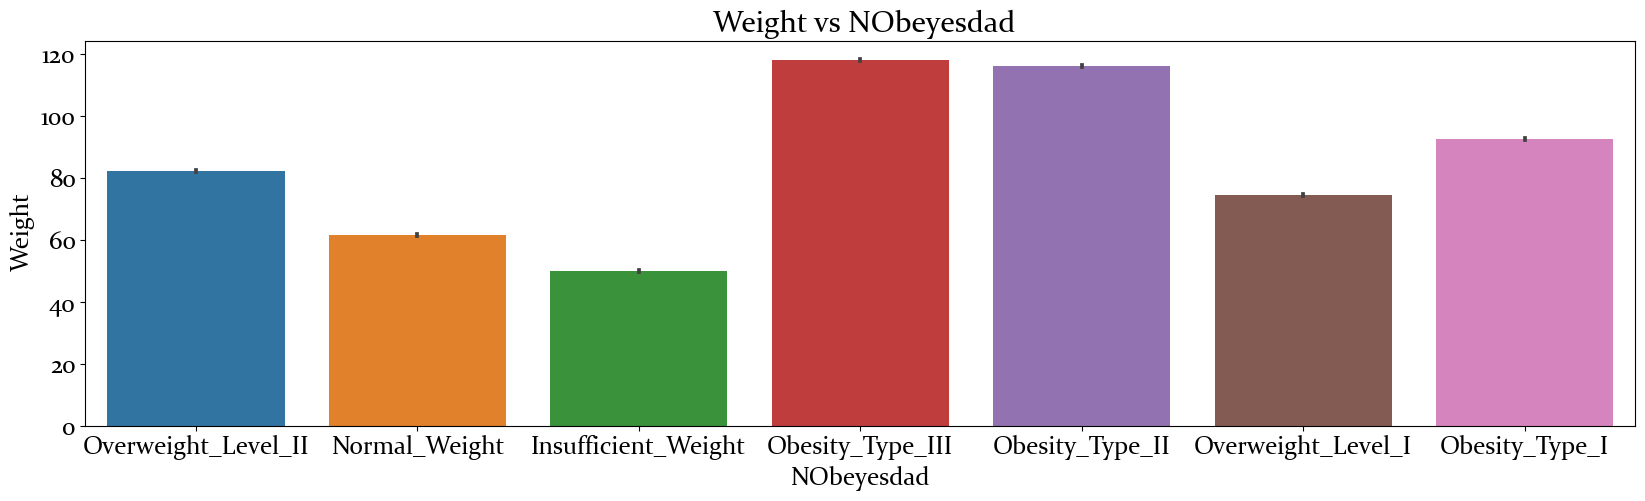

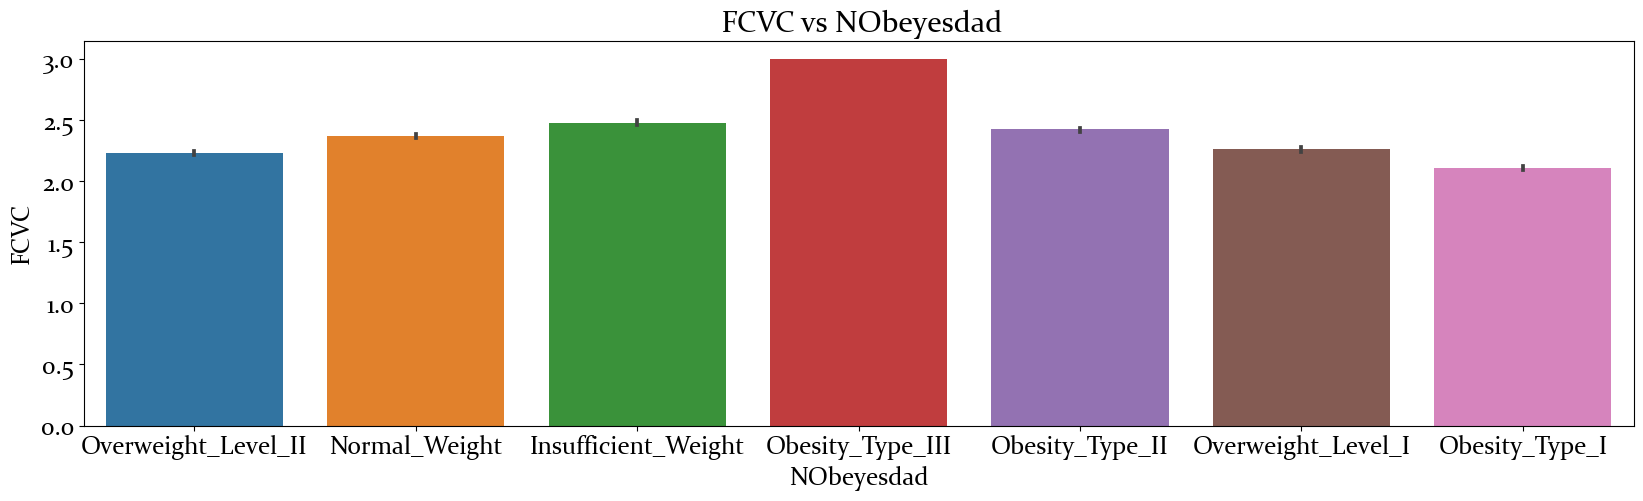

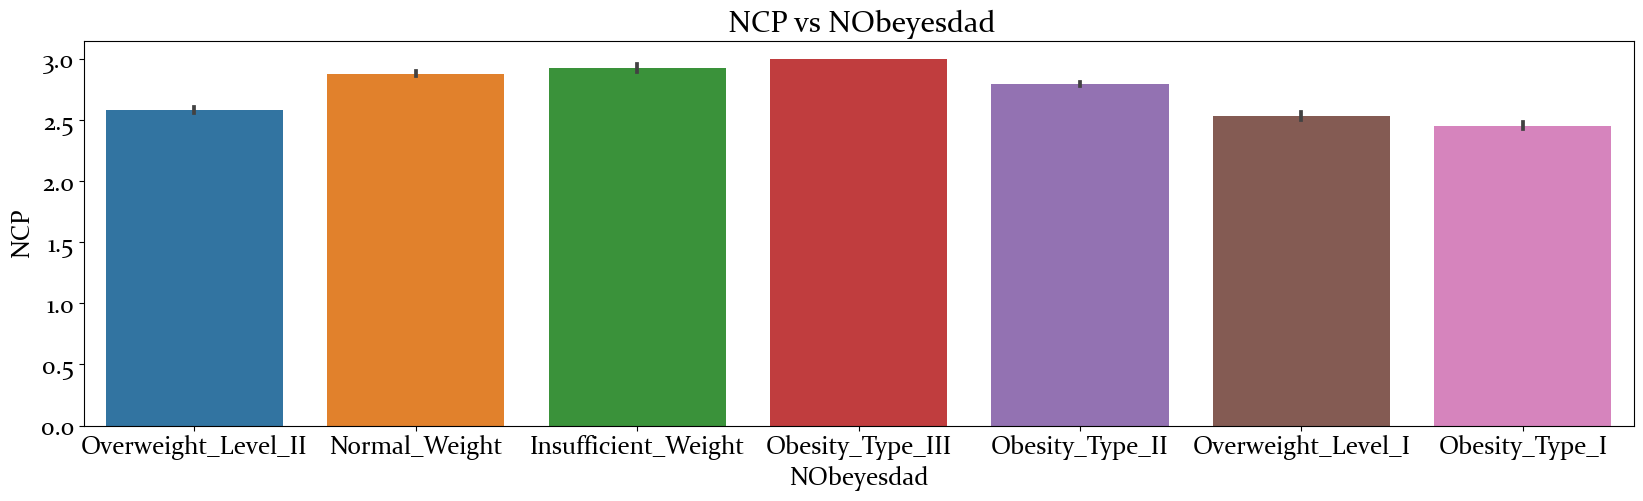

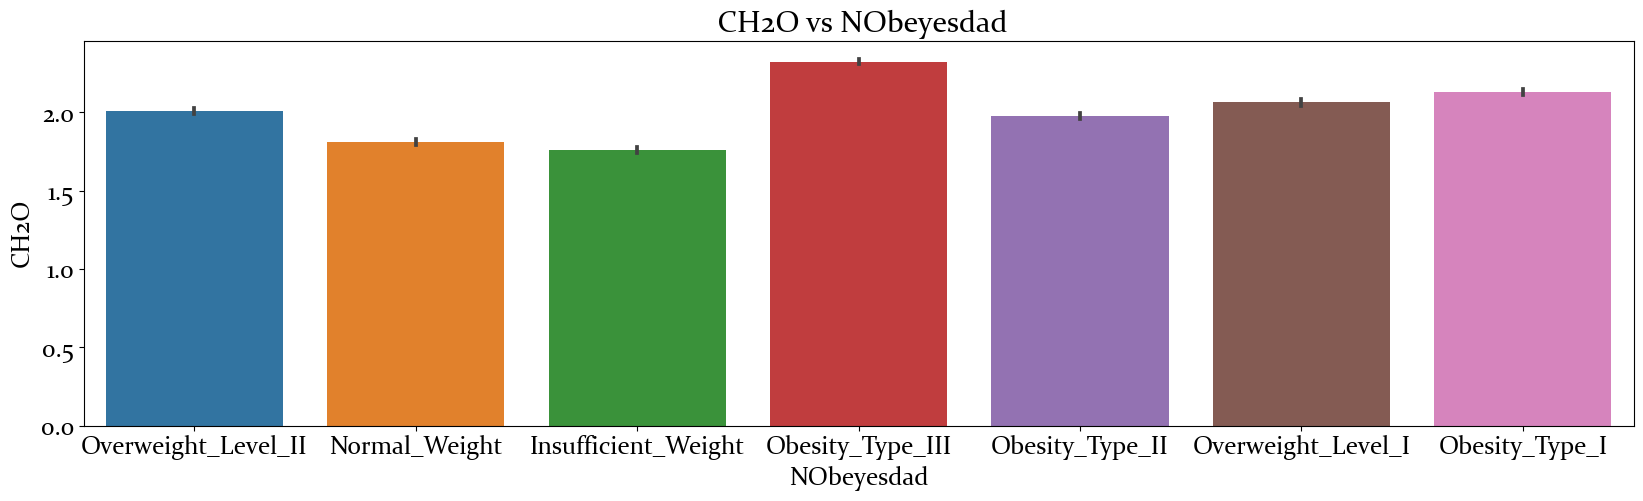

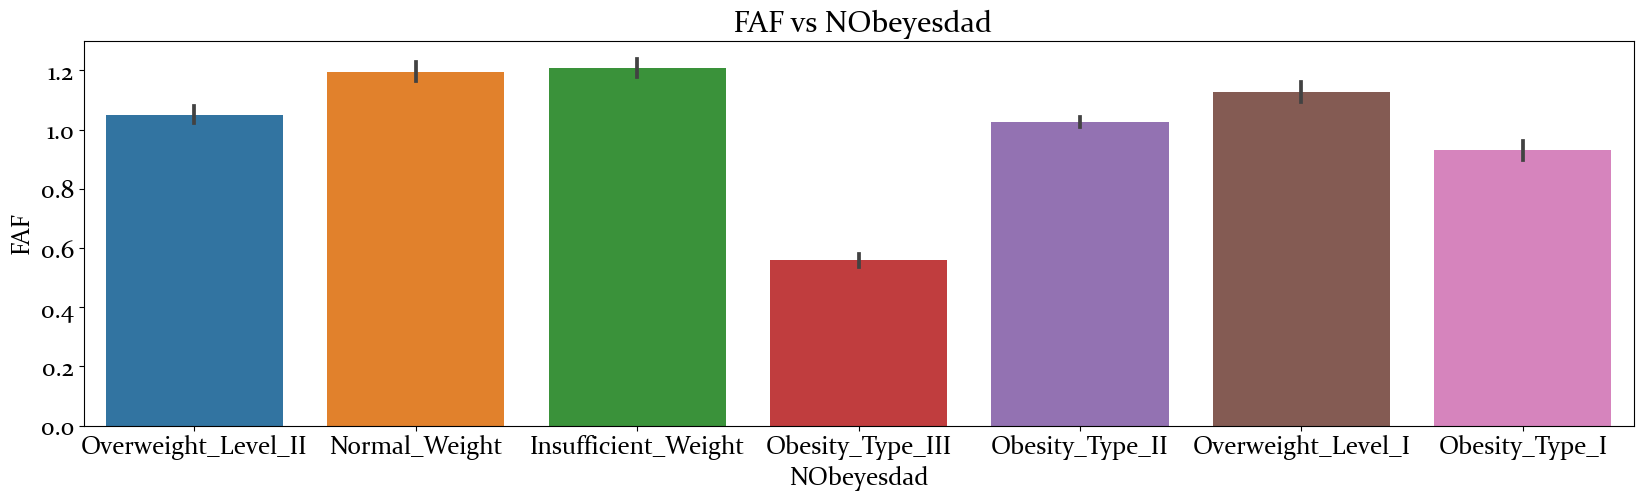

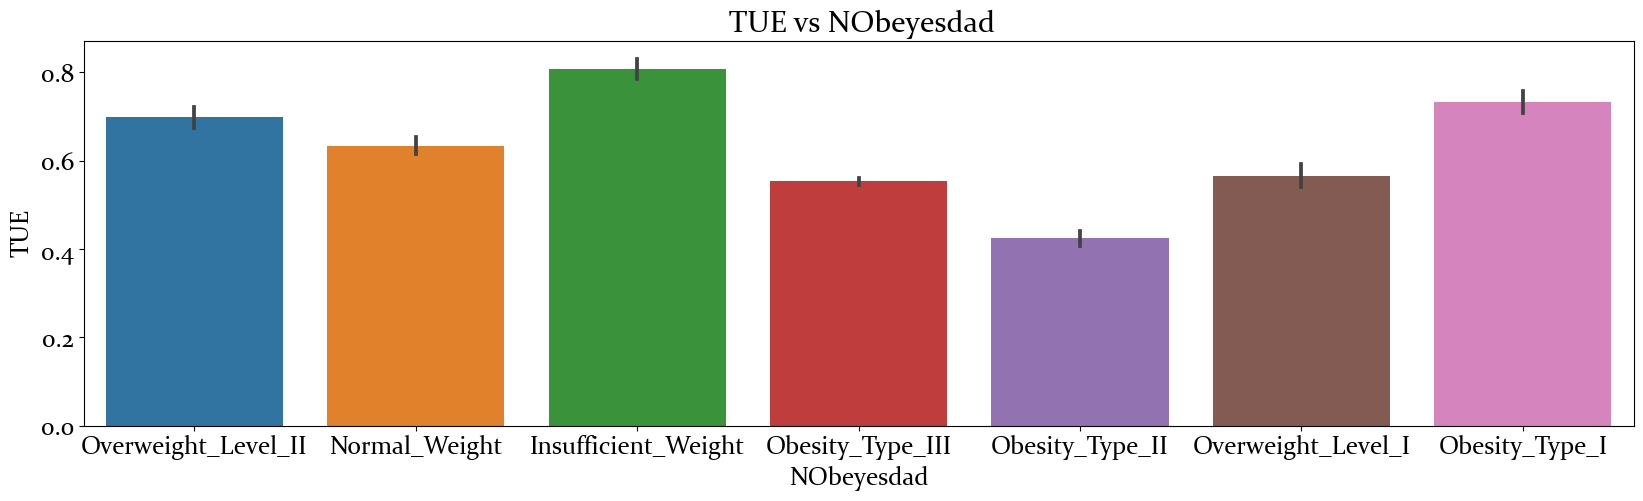

In [11]:
for var in numerical:
    plt.figure(figsize=(20,5))
    fig = sns.barplot(x = target, y = var, data = train)
    fig.set_title(f' {var} vs NObeyesdad')
    plt.show()

Though the above graphs are meaningful, it is still a bit hard to deduce some kind of insight from a barplot. We can also draw a violinplot to have a much better and clear insight on the relationship between numerical columns and the target variable

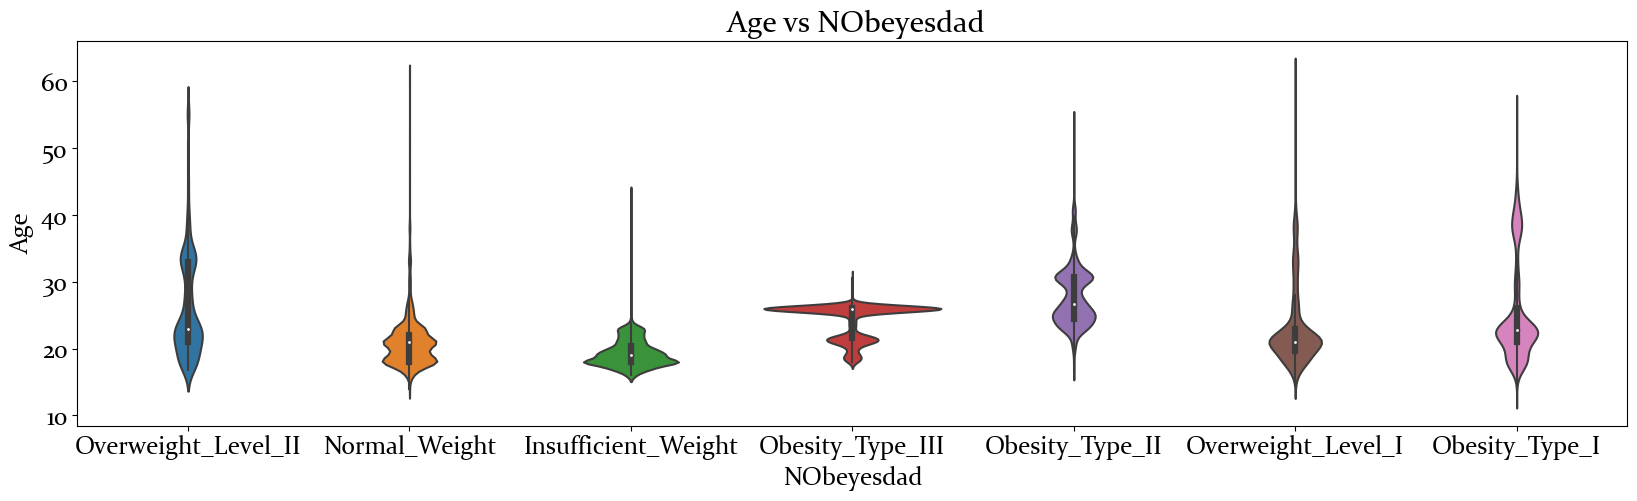

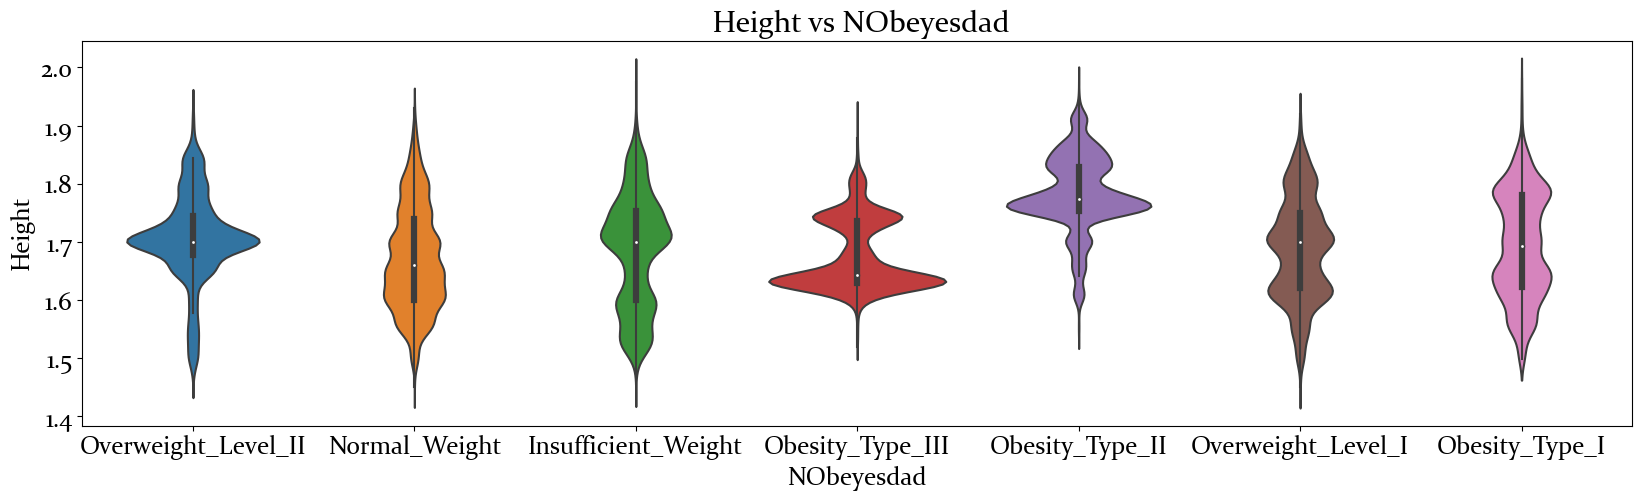

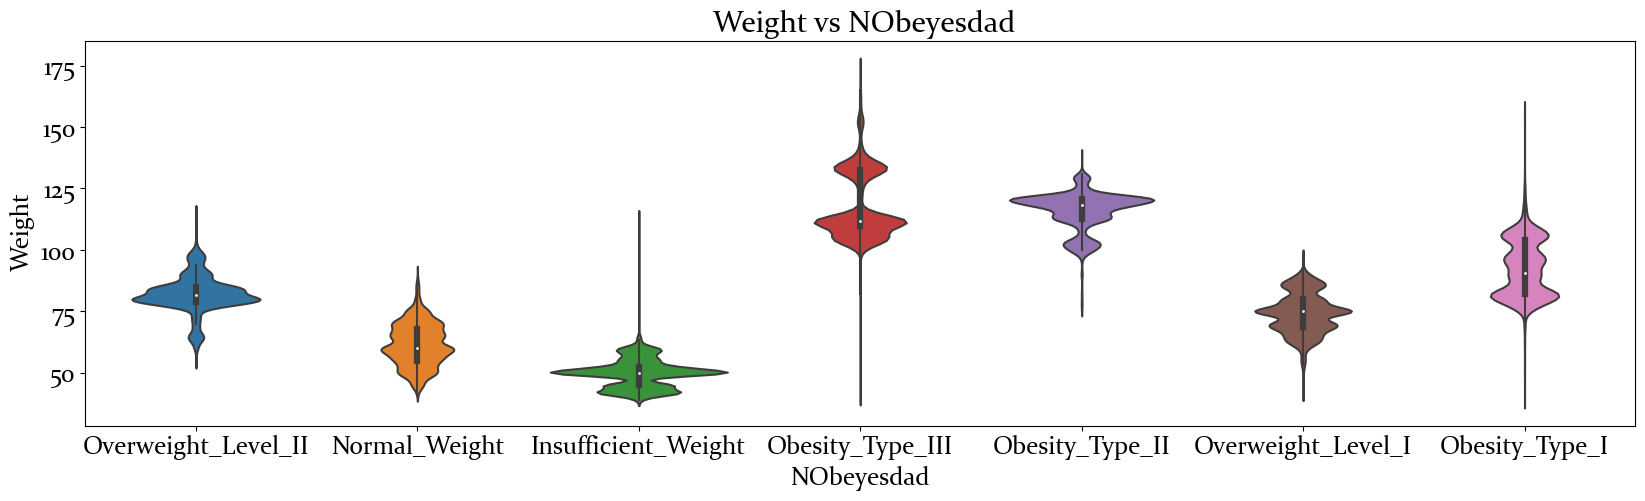

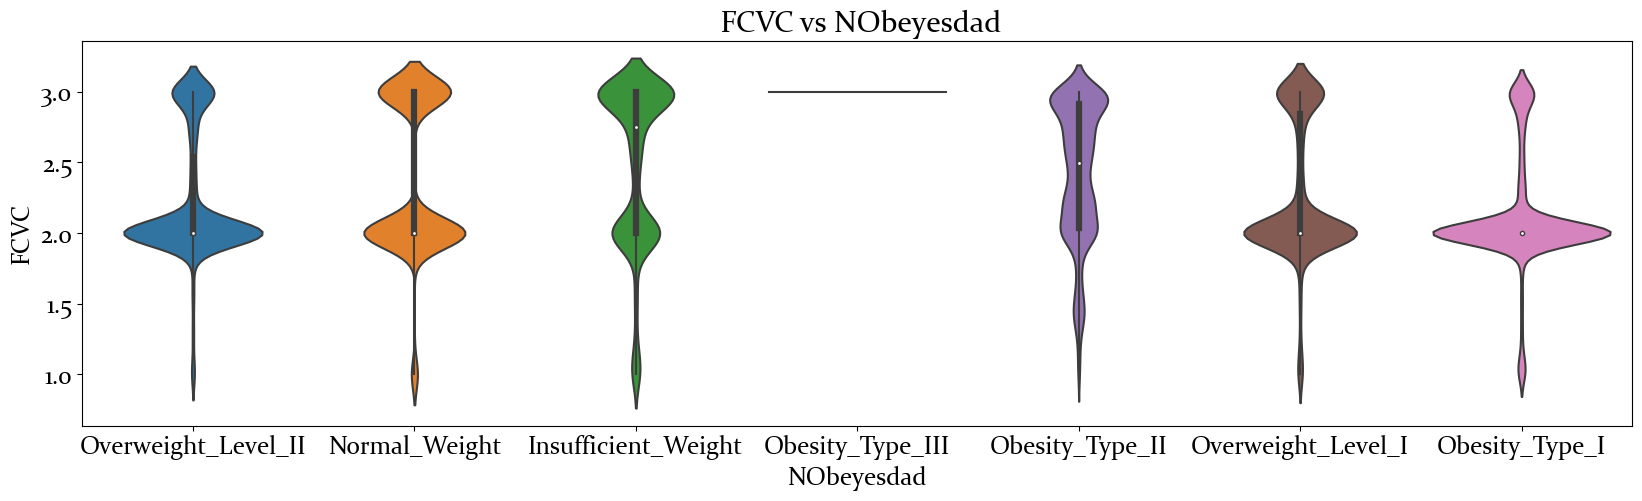

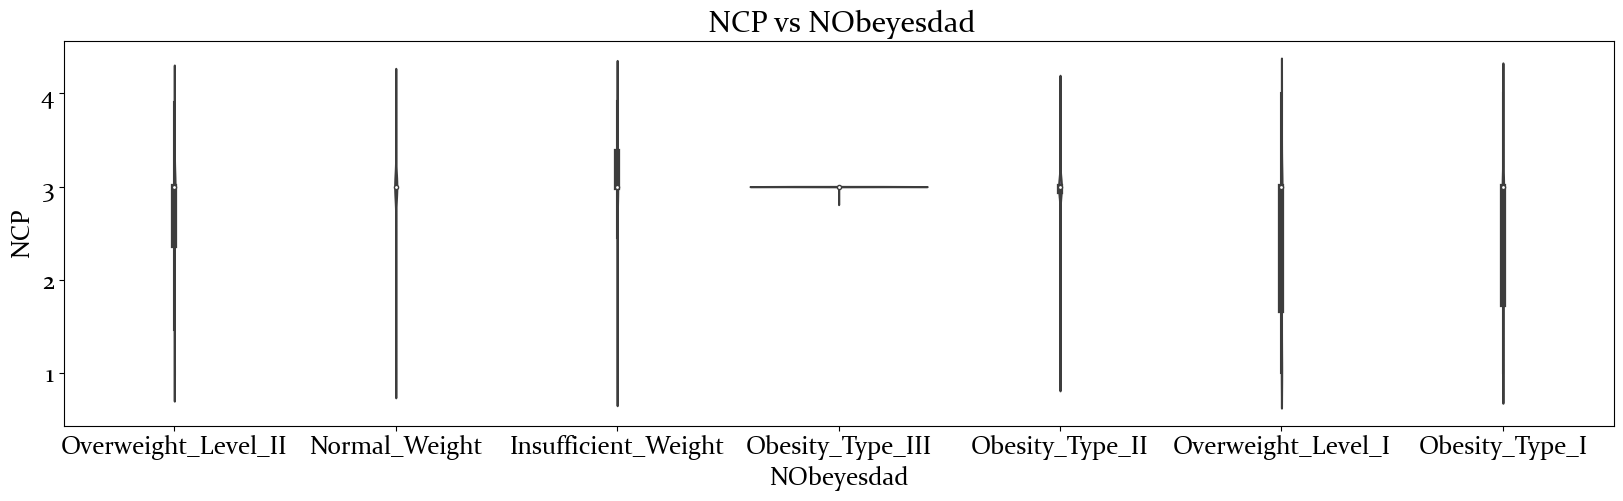

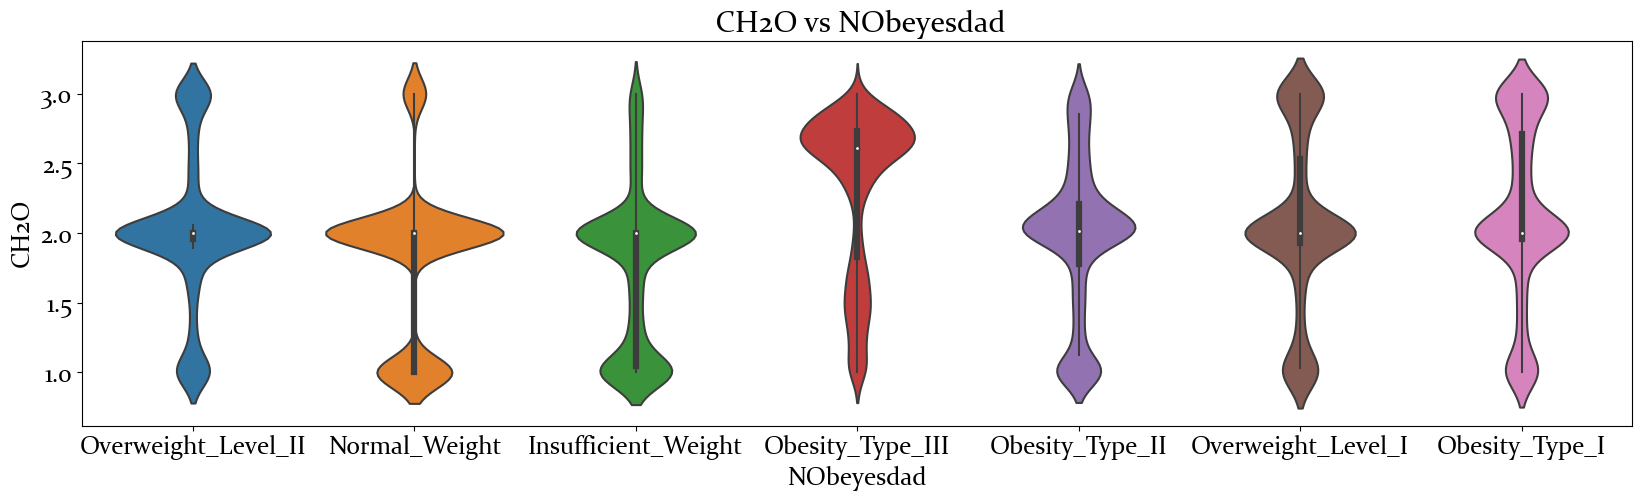

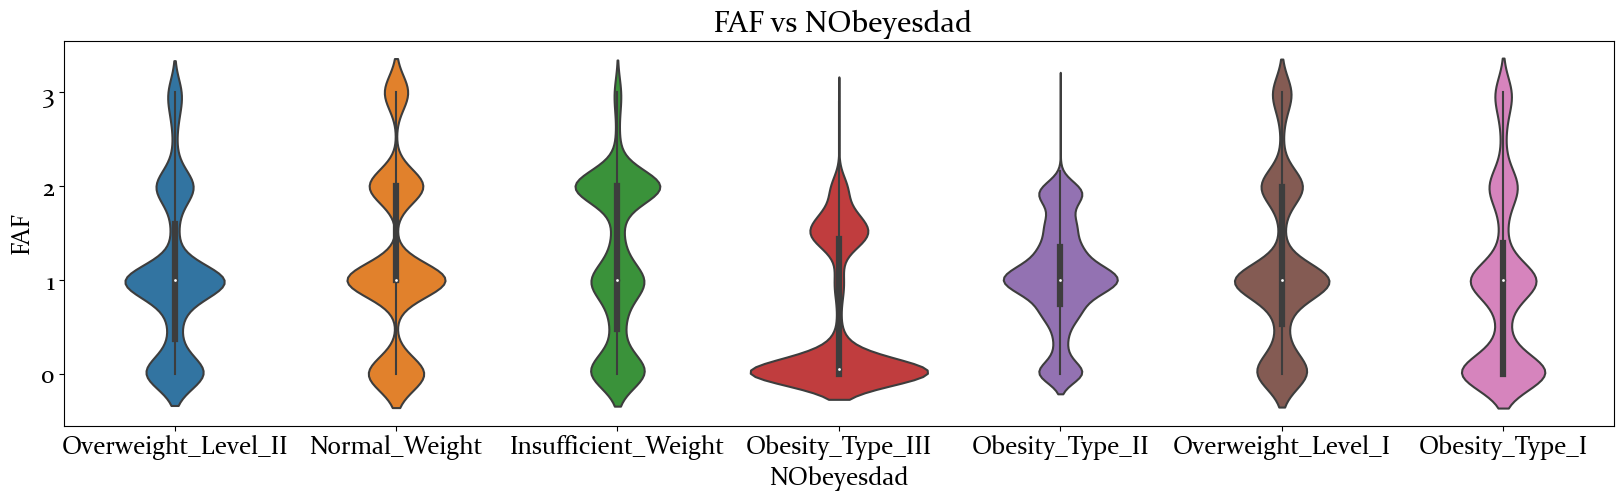

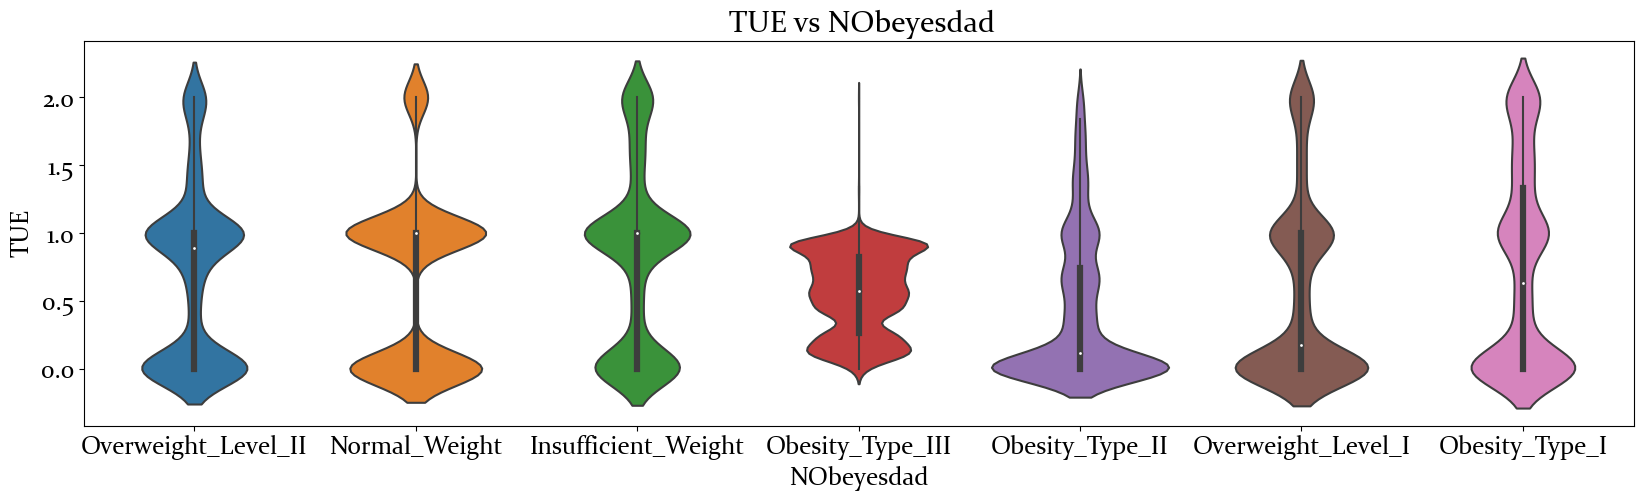

In [12]:
for var in numerical:
    plt.figure(figsize=(20,5))
    fig = sns.violinplot(x = target, y = var, data = train)
    fig.set_title(f' {var} vs NObeyesdad')
    plt.show()

It would appear from the data that the higher obesity type I II and II, the age is below 40 and 1 significant observation is that the Obesity III is highly prelevant between the ages 20-30.

Though Height cannot give a significant relationship conclusion, Weight can provide a key insight showing a strong.

relation between types I II and III. It is almost certain to say that people over the weight of 100 kgs fall into any of the 3 types.

The most important which we can see if for the FCVC(Consumption of Vegetables), which is almost none for the Obesity III.

It is also clear that the person with Obesity type III, has 3 complete meals everyday.

Physical activity frequency (FAF) - another key insight involving FAF is that the Obesity type III, much of the data is spread in the 0 range, which means there is almost no physical activity for that target category.

<a id='catvtar'></a>

#### Categorical vs Target

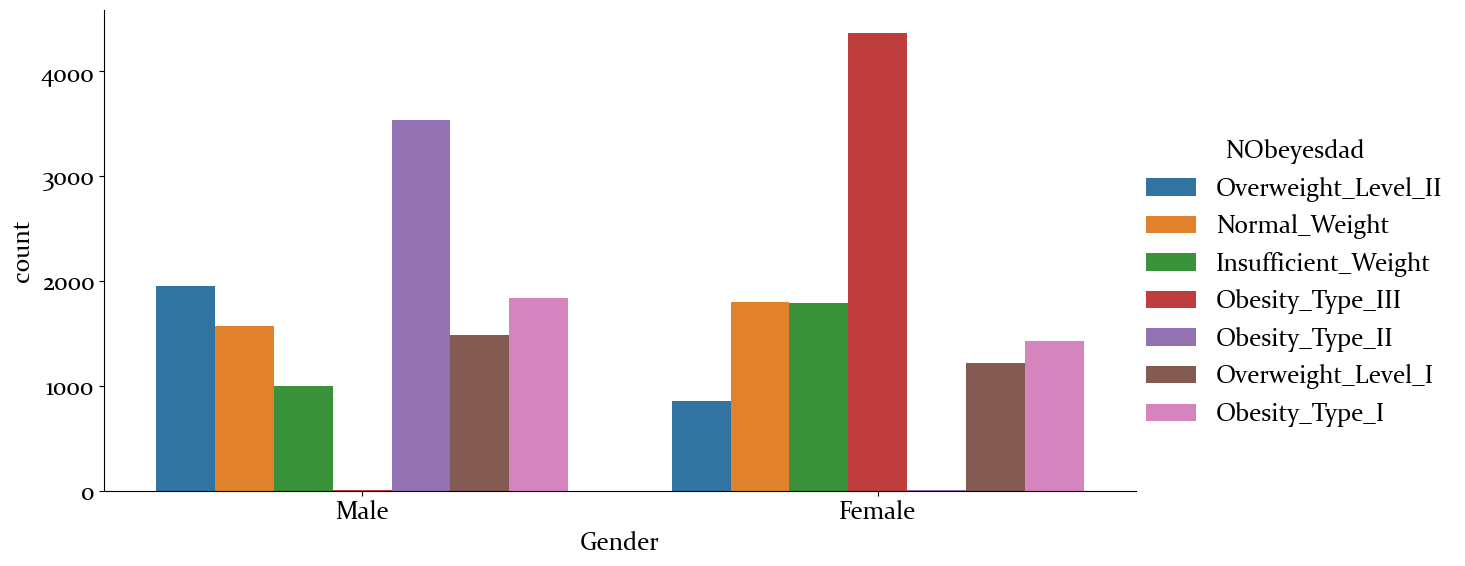

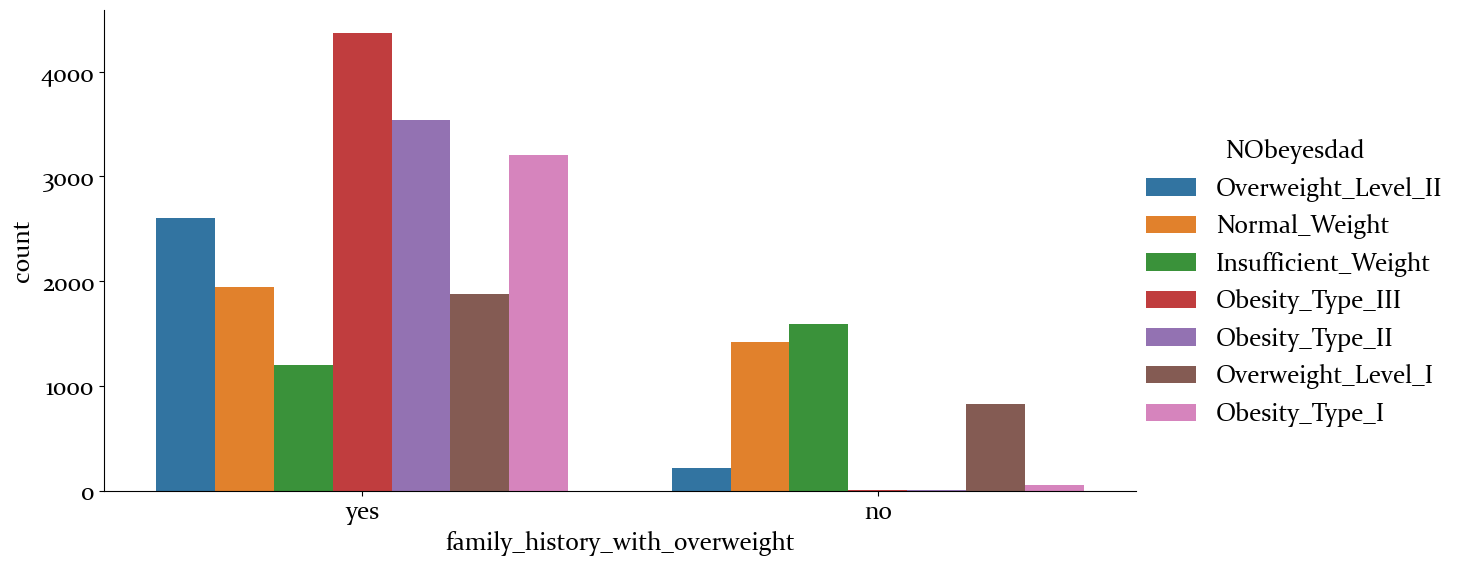

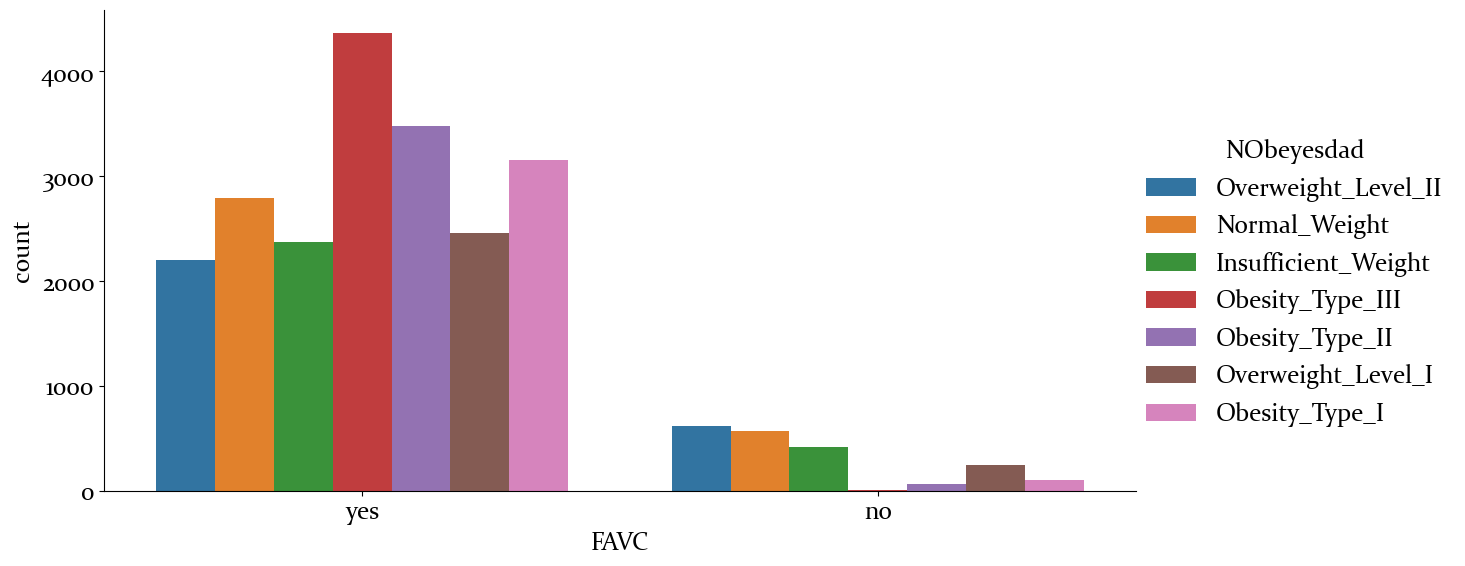

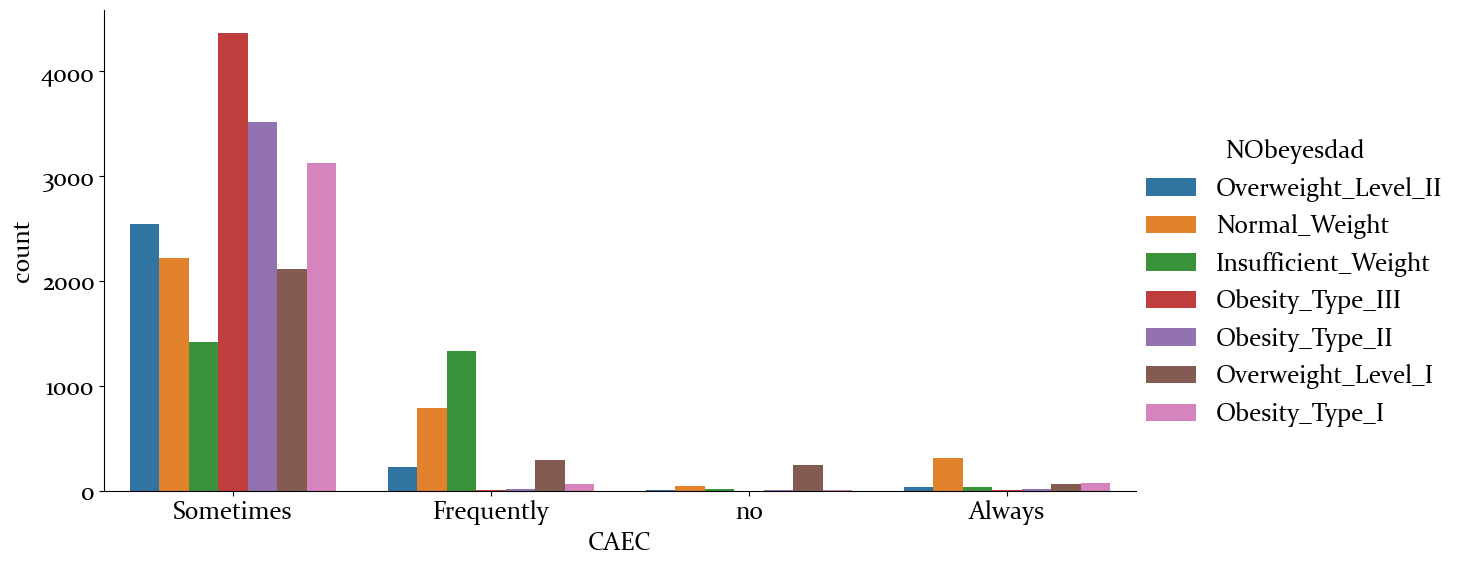

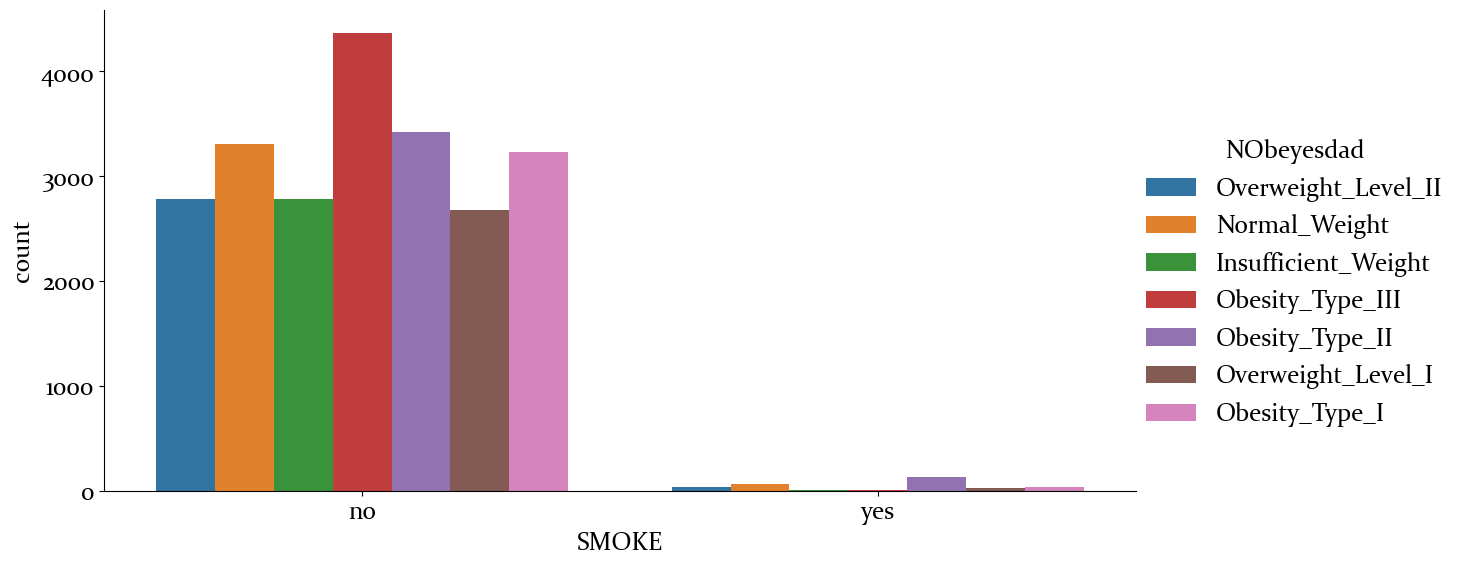

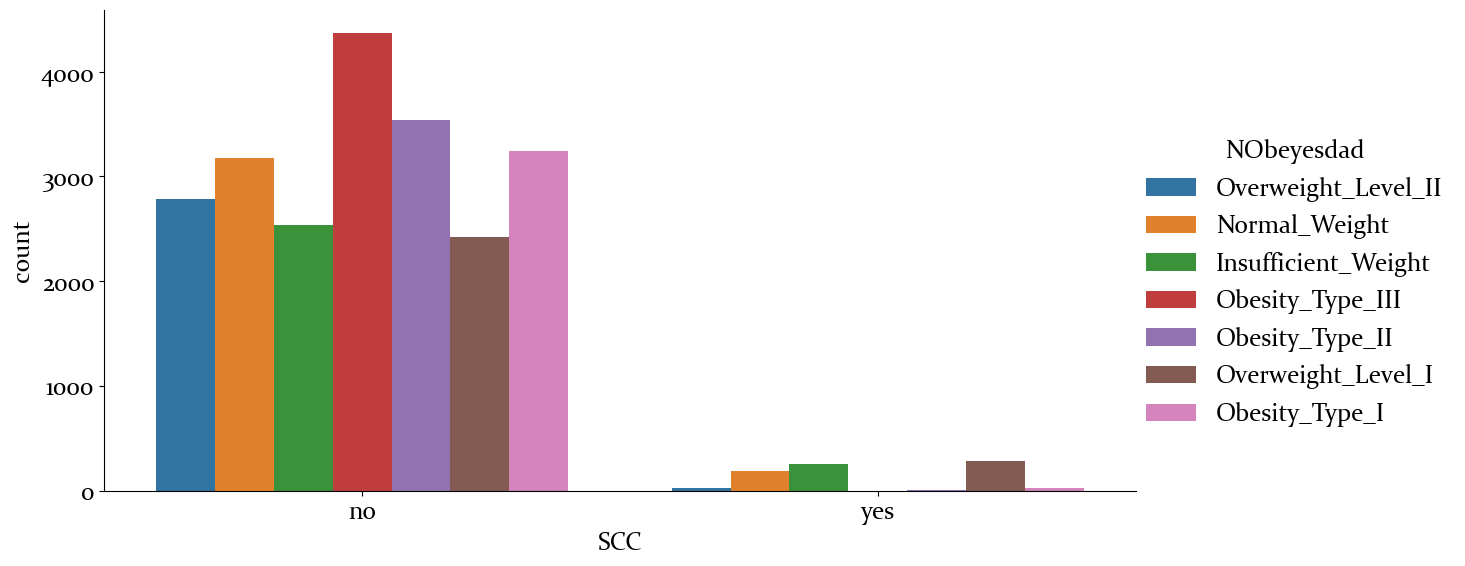

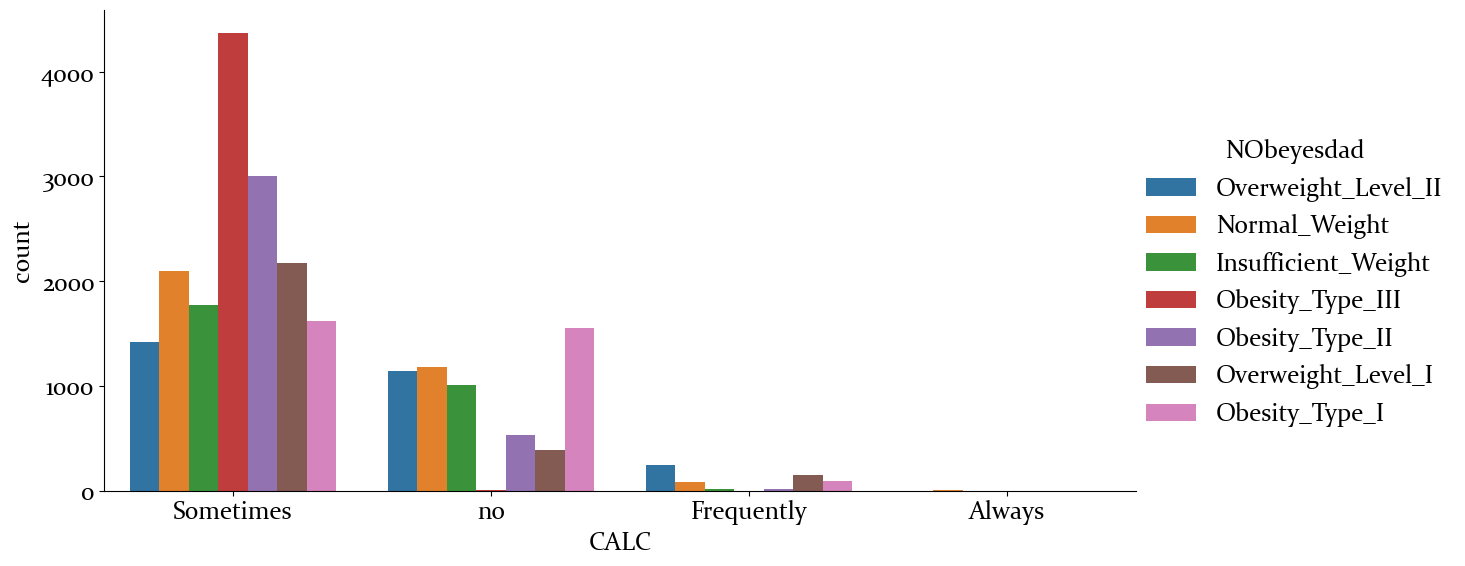

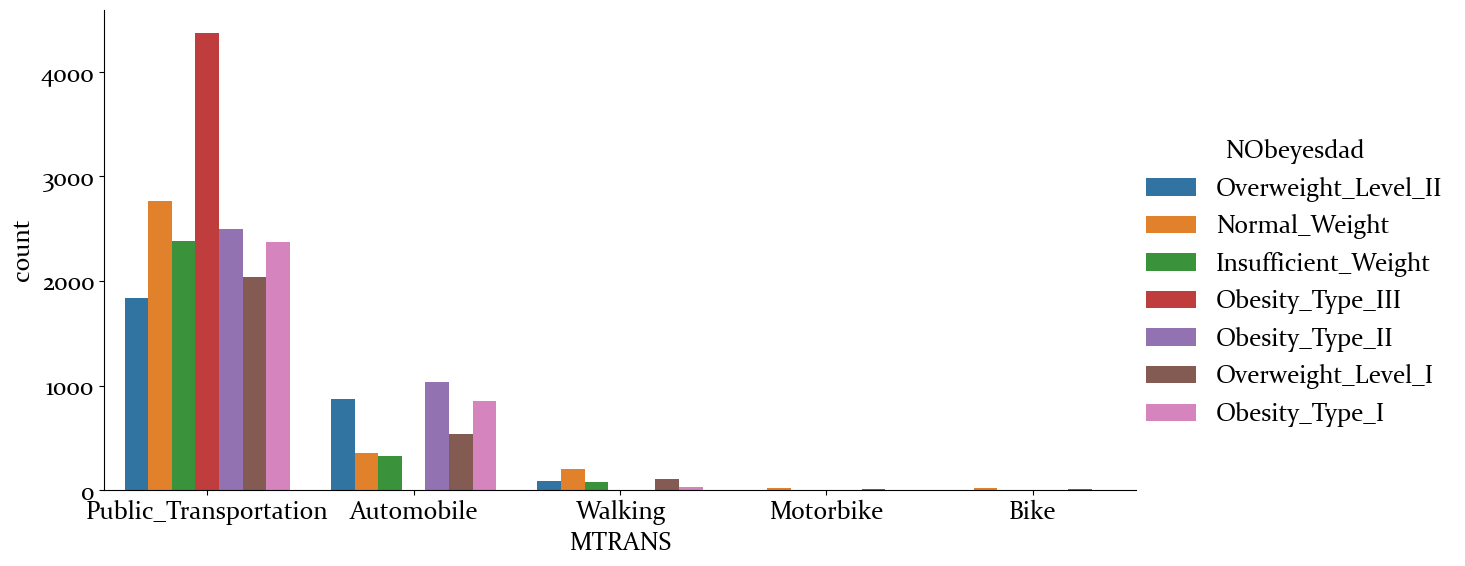

In [13]:
for var in categorical:
    fig = sns.catplot(data=train, x=var, hue="NObeyesdad", kind="count",height=6, aspect=2)

In [14]:
train[train['NObeyesdad'] == 'Obesity_Type_III']['Gender'].value_counts(normalize=True)

Female    0.998627
Male      0.001373
Name: Gender, dtype: float64

Obesity type II is highly prevelant in Males and and type III in females with 98% of Obesity III cases in Females.

Family history and FAVC also has a strong correlation with NObeyesdad.

By the looks of SMOKE graph, it seems that Smoking doesnt have any affect of getting obese.

SCC - Calorific monitoring can help with Obesity prevention, with people who monitor calorific intake having significantly less cases of diabetes

People who travel on Public Transportation have significantly higher number Obseity cases.This may have to examined further as not all correlation displays causality.

<a id='FE'></a>
### Feature Engineering

In [15]:
# Derive new features

train['BMI'] = train['Weight']/np.square(train['Height'])
test['BMI'] = test['Weight']/np.square(test['Height'])   

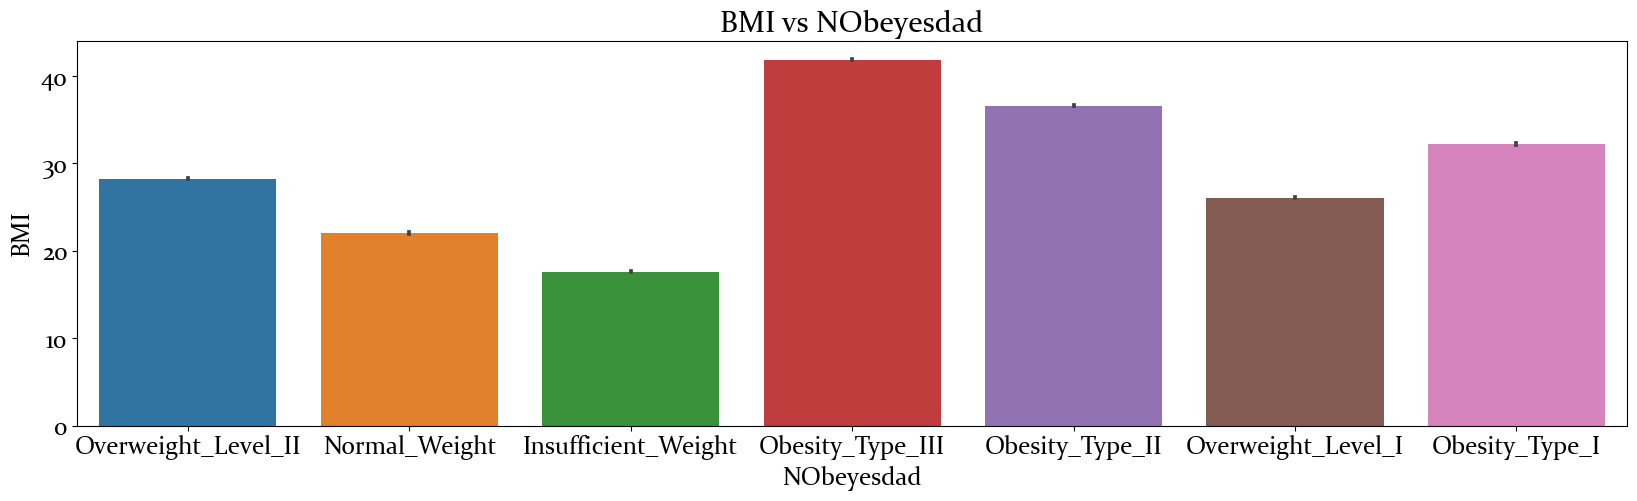

In [16]:
plt.figure(figsize=(20,5))
fig = sns.barplot(x = target, y = 'BMI', data = train)
fig.set_title('BMI vs NObeyesdad')
plt.show()

It can be clearly deduced from the above graph that higher the BMI higher the obesity level.

In [17]:
train = pd.get_dummies(train,columns=categorical)
test = pd.get_dummies(test,columns=categorical)

In [18]:
le=LabelEncoder()
train[target] = le.fit_transform(train[target])

<a id ='model'></a>

### Model Building

In [19]:
X_train,X_val,y_train,y_val = train_test_split(train.drop(target,axis=1),train[target],test_size=0.2)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((18276, 32), (4569, 32), (18276,), (4569,))

<a id='baseline'></a>
#### Baseline Modelling

In [20]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
accuracy_score(y_val,rf.predict(X_val))

0.9074195666447801

<a id='tuning'></a>
#### Hyperparameter Tuning

In [21]:
def rf_objective(trial):
    rf_params = {
      'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
      'max_depth': trial.suggest_int('max_depth', 2, 32),
      'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
      'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
      'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
      'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }

    rf_model=RandomForestClassifier(**rf_params)    
    rf_model.fit(X_train,y_train)

    rf_acc = accuracy_score(y_val,rf_model.predict(X_val))
    return rf_acc

rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(rf_objective, n_trials=50,n_jobs=-1)

[I 2024-04-07 23:02:41,358] A new study created in memory with name: no-name-015f799a-cdc5-4ddf-b94d-a3e89733f8ac
[I 2024-04-07 23:03:15,839] Trial 3 finished with value: 0.9036988400087547 and parameters: {'n_estimators': 390, 'max_depth': 31, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}. Best is trial 3 with value: 0.9036988400087547.
[I 2024-04-07 23:03:25,173] Trial 0 finished with value: 0.8958196541912892 and parameters: {'n_estimators': 523, 'max_depth': 23, 'min_samples_split': 9, 'min_samples_leaf': 16, 'max_features': 'log2', 'bootstrap': True}. Best is trial 3 with value: 0.9036988400087547.
[I 2024-04-07 23:03:29,745] Trial 1 finished with value: 0.9012913110089735 and parameters: {'n_estimators': 512, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'auto', 'bootstrap': False}. Best is trial 3 with value: 0.9036988400087547.
[I 2024-04-07 23:03:34,822] Trial 4 finished with value: 0.9030422411906

In [24]:
def xgb_objective(trial):
    xgb_params = {
     'min_child_weight': trial.suggest_int('min_child_weight', 0, 10),
     'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
     'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
     'max_depth': trial.suggest_int('max_depth', 4, 10),
     'subsample': trial.suggest_float('subsample', 0, 1.0),
     'colsample_bytree': trial.suggest_float('colsample_bytree', 0, 1.0),
     'random_state': 42,
     'gamma': trial.suggest_float('gamma', 0, 1),
     'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
     'reg_lambda': trial.suggest_float('reg_lambda', 0, 1)
    }

    xgb_model=XGBClassifier(**xgb_params)    
    xgb_model.fit(X_train,y_train)

    xgb_acc = accuracy_score(y_val,xgb_model.predict(X_val))
    return xgb_acc

xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(xgb_objective, n_trials=50,n_jobs=-1)

[I 2024-04-08 00:11:23,629] A new study created in memory with name: no-name-4d3c5e67-05f0-4b33-ba0b-d4632f22977a
[I 2024-04-08 00:15:39,281] Trial 4 finished with value: 0.9010724447362661 and parameters: {'min_child_weight': 4, 'learning_rate': 0.05299774128738442, 'n_estimators': 1330, 'max_depth': 9, 'subsample': 0.8423278308376161, 'colsample_bytree': 0.02822954278486578, 'gamma': 0.015370989978101712, 'reg_alpha': 0.11004618167987701, 'reg_lambda': 0.6693733913053105}. Best is trial 4 with value: 0.9010724447362661.
[I 2024-04-08 00:17:31,584] Trial 3 finished with value: 0.908513898008317 and parameters: {'min_child_weight': 6, 'learning_rate': 0.03999569326357504, 'n_estimators': 1886, 'max_depth': 10, 'subsample': 0.06977557666703982, 'colsample_bytree': 0.09925072803777957, 'gamma': 0.3919946444892579, 'reg_alpha': 0.3927742606958986, 'reg_lambda': 0.9980199289294254}. Best is trial 3 with value: 0.908513898008317.
[I 2024-04-08 00:18:47,223] Trial 1 finished with value: 0.91

KeyboardInterrupt: 

In [23]:
def lgbm_objective(trial):
    lgbm_params = {
        'num_class': 7,
        'random_state': 42,
        'metric': 'multi_logloss',
        "boosting_type": "gbdt",
        'objective': 'multiclass',
        
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 400, 1000),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-1, 10.0),
        'max_depth': trial.suggest_int('max_depth', 6, 20),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.9),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
    }

    lgbm_model=lgbm.LGBMClassifier(**lgbm_params)
    lgbm_model.fit(X_train,y_train)

    lgbm_acc = accuracy_score(y_val,lgbm_model.predict(X_val))
    return lgbm_acc

lgbm_study = optuna.create_study(direction='maximize')
lgbm_study.optimize(lgbm_objective, n_trials=50,n_jobs=-1)

[I 2024-04-07 23:57:54,950] A new study created in memory with name: no-name-85e21a31-ec94-40e7-b524-417115d6347e
[I 2024-04-07 23:59:07,068] Trial 4 finished with value: 0.9148610199168308 and parameters: {'learning_rate': 0.04437077706518538, 'n_estimators': 794, 'reg_alpha': 4.8322352439813985, 'reg_lambda': 0.15019141258172522, 'max_depth': 14, 'colsample_bytree': 0.5639764758098406, 'subsample': 0.8057196804978686, 'min_child_samples': 28}. Best is trial 4 with value: 0.9148610199168308.
[I 2024-04-07 23:59:14,459] Trial 0 finished with value: 0.9113591595535128 and parameters: {'learning_rate': 0.013572983221708999, 'n_estimators': 437, 'reg_alpha': 0.7882788992183342, 'reg_lambda': 5.270001189070554, 'max_depth': 18, 'colsample_bytree': 0.7009230057197677, 'subsample': 0.9449670715940429, 'min_child_samples': 22}. Best is trial 4 with value: 0.9148610199168308.
[I 2024-04-07 23:59:36,493] Trial 1 finished with value: 0.9157364850076604 and parameters: {'learning_rate': 0.0359932

In [25]:
rf_best_params = rf_study.best_trial.params
rf_best_params

{'n_estimators': 709,
 'max_depth': 26,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'bootstrap': True}

In [26]:
xgb_best_params = xgb_study.best_trial.params
xgb_best_params

{'min_child_weight': 2,
 'learning_rate': 0.03693232542402717,
 'n_estimators': 1419,
 'max_depth': 4,
 'subsample': 0.9969097537767568,
 'colsample_bytree': 0.7480426352998913,
 'gamma': 0.4883840471737888,
 'reg_alpha': 0.9278291713264182,
 'reg_lambda': 0.13047230524826414}

In [27]:
lgbm_best_params = lgbm_study.best_trial.params
lgbm_best_params

{'learning_rate': 0.021032563972416422,
 'n_estimators': 762,
 'reg_alpha': 0.005120379251981764,
 'reg_lambda': 0.9067514038118714,
 'max_depth': 10,
 'colsample_bytree': 0.4953262380740112,
 'subsample': 0.8711687393578841,
 'min_child_samples': 26}

[I 2024-04-08 00:26:15,078] Trial 7 finished with value: 0.9111402932808055 and parameters: {'min_child_weight': 4, 'learning_rate': 0.057067102048481644, 'n_estimators': 1852, 'max_depth': 8, 'subsample': 0.8797514761086327, 'colsample_bytree': 0.9824306298601566, 'gamma': 0.8768138512529587, 'reg_alpha': 0.18472401723837328, 'reg_lambda': 0.23603237193688043}. Best is trial 1 with value: 0.9152987524622456.


In [28]:
print('Tuned Best score for Random Forest is: ',rf_study.best_value)

Tuned Best score for Random Forest is:  0.9058875027358284


In [29]:
print('Tuned Best score for Random Forest is: ',xgb_study.best_value)

Tuned Best score for Random Forest is:  0.9152987524622456


In [30]:
print('Tuned Best score for Random Forest is: ',lgbm_study.best_value)

Tuned Best score for Random Forest is:  0.9172685489166119


In [31]:
lgbm_best_model = lgbm.LGBMClassifier(**lgbm_best_params)
lgbm_best_model.fit(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2326
[LightGBM] [Info] Number of data points in the train set: 18276, number of used features: 31
[LightGBM] [Info] Start training from score -2.113049
[LightGBM] [Info] Start training from score -1.917163
[LightGBM] [Info] Start training from score -1.952773
[LightGBM] [Info] Start training from score -1.853369
[LightGBM] [Info] Start training from score -1.642310
[LightGBM] [Info] Start training from score -2.142915
[LightGBM] [Info] Start training from score -2.098220
[Light

LGBMClassifier(colsample_bytree=0.4953262380740112,
               learning_rate=0.021032563972416422, max_depth=10,
               min_child_samples=26, n_estimators=762,
               reg_alpha=0.005120379251981764, reg_lambda=0.9067514038118714,
               subsample=0.8711687393578841)

In [32]:
sample_submission_df = pd.read_csv('data/sample_submission.csv')
sample_submission_df['NObeyesdad'] = lgbm_best_model.predict(test.drop('id',axis=1))
sample_submission_df['NObeyesdad'] = le.inverse_transform(sample_submission_df['NObeyesdad'])
sample_submission_df.to_csv('data/submission-lgbm-optuna.csv', index=False)
sample_submission_df.head()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
